# Complete Analysis and Visualization

1. Import necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

2. Read the CSV File

In [2]:
df = pd.read_csv('data.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


3. Drop Unwanted Columns and Rename Columns

In [3]:
df = df.drop(columns=['Engine Fuel Type', 'Market Category', 'Vehicle Size', 'Vehicle Style', 'Popularity', 'Number of Doors'])
df.head()

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


In [4]:
df = df.rename(columns={'Engine HP':'HP', 'Engine Cylinders':'Cylinders', 'Transmission Type':'Transmission', 'Driven_Wheels':'Drive Mode', 'Number of Doors':'Doors', 'Vehicle Size':'Size', 'Vehicle Style':'Style', 'highway MPG':'MPG-H', 'city mpg':'MPG-C'})
df.head()

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,MPG-H,MPG-C,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


In [5]:
df.shape

(11914, 10)

4. Check for duplicates and Drop Duplicate Rows

In [6]:
df[df.duplicated()].shape
df = df.drop_duplicates()
df.shape

(10925, 10)

5. Check for Null Values and Drop Null Values

In [7]:
df.isnull().sum()
df = df.dropna()
df.shape

(10827, 10)

6. Calculate Inter Quartile Range(IQR)

In [8]:
Q1 = df.quantile(0.25, numeric_only=True)
Q3 = df.quantile(0.75, numeric_only=True)
IQR = Q3 - Q1
print(IQR)

Year             9.0
HP             130.0
Cylinders        2.0
MPG-H            8.0
MPG-C            6.0
MSRP         21327.5
dtype: float64


7. Find Outliers Using BoxPlot

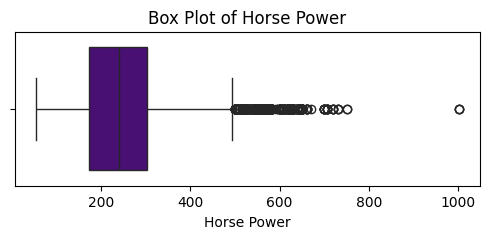

In [9]:
plt.figure(figsize=(6,2))
sns.boxplot(x=df['HP'], color='indigo')
plt.title("Box Plot of Horse Power")
plt.xlabel("Horse Power")
plt.show()

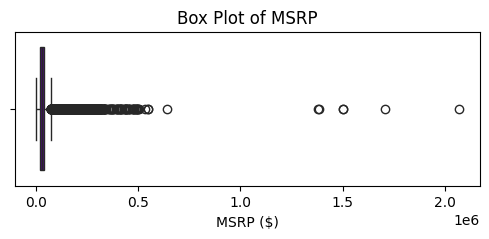

In [10]:
plt.figure(figsize=(6,2))
sns.boxplot(x=df['MSRP'], color='indigo')
plt.title("Box Plot of MSRP")
plt.xlabel("MSRP ($)")
plt.show()

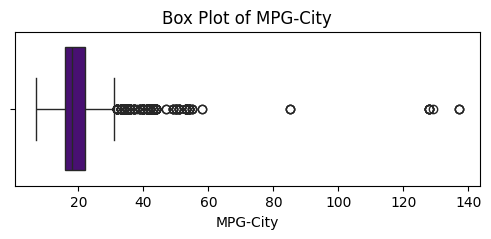

In [11]:
plt.figure(figsize=(6,2))
sns.boxplot(x=df['MPG-C'], color='indigo')
plt.title("Box Plot of MPG-City")
plt.xlabel("MPG-City")
plt.show()

8. Visualise Top 40 Highest Number od Car Makers

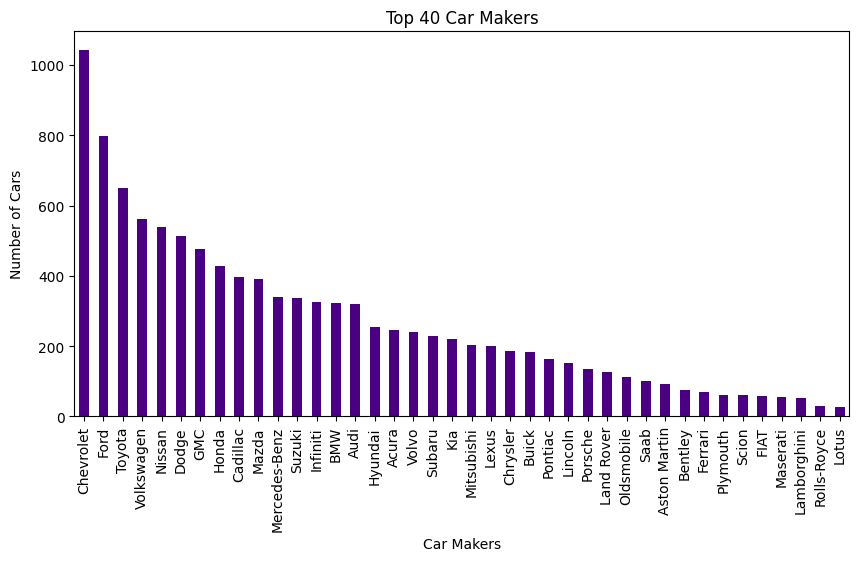

In [12]:
df.Make.value_counts().nlargest(40).plot(kind='bar', color='indigo', figsize=(10,5))
plt.title("Top 40 Car Makers")
plt.xlabel("Car Makers")
plt.ylabel("Number of Cars")
plt.show()

9. HeatMaps

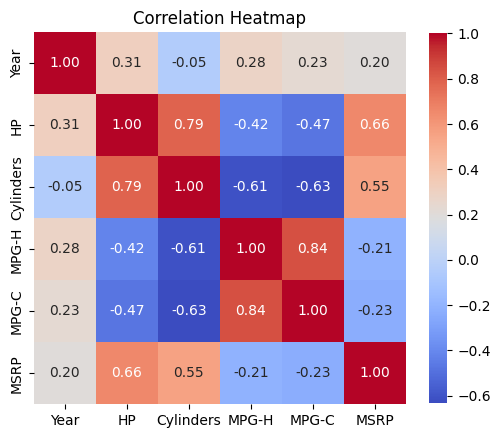

In [20]:
plt.figure(figsize=(6,6))
c = df.corr(numeric_only=True)
sns.heatmap(c, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title("Correlation Heatmap")
plt.show()